In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = sns.load_dataset('iris')
df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
21,5.1,3.7,1.5,0.4,setosa
93,5.0,2.3,3.3,1.0,versicolor
109,7.2,3.6,6.1,2.5,virginica
118,7.7,2.6,6.9,2.3,virginica


In [17]:
# converting the output column using label encoder.
enc = LabelEncoder()
df['species'] = enc.fit_transform(df['species'])

In [18]:
df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
58,6.6,2.9,4.6,1.3,1
63,6.1,2.9,4.7,1.4,1
101,5.8,2.7,5.1,1.9,2
64,5.6,2.9,3.6,1.3,1


In [19]:
# selecting only few columns just for easness purpose.
df = df[['sepal_length','sepal_width','species']]
df.head(3)

,sepal_length,sepal_width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0


In [20]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [21]:
# training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
clf = LogisticRegression(multi_class='multinomial')

In [26]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cn = pd.DataFrame(confusion_matrix(y_test, y_pred))
cn

,0,1,2
0,13,1,0
1,0,4,4
2,0,2,6


In [24]:
df.groupby('species').count()

,sepal_length,sepal_width
species,,
0,50,50
1,50,50
2,50,50


In [30]:
# making the prediction using probability.
query = np.array([[3.4, 2.9]])
clf.predict_proba(query)

array([[9.91368559e-01, 8.49511543e-03, 1.36325250e-04]])

In [31]:
clf.predict(query)

array([0])

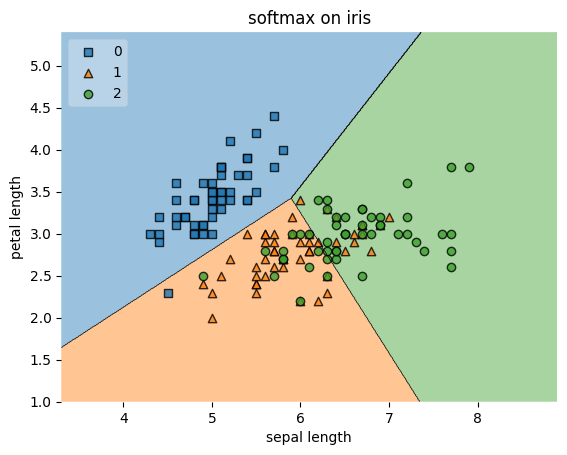

In [37]:
# plotting the decision boundary:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf, legend = 2)

# adding axes notations
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('softmax on iris')
plt.show()